In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import os
import csv
import datetime as dt
import numpy as np
from sklearn.model_selection import RandomizedSearchCV


In [2]:
DATA_DIR = Path('DATA')
# dfile = DATA_DIR / 'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'
#dfile = DATA_DIR / 'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'
#df = pd.concat((pd.read_csv(DATA_DIR/f) for f in os.listdir(DATA_DIR) if f.startswith('Friday')), ignore_index=True)
#dfile = DATA_DIR / 'Friday-WorkingHours-Morning.pcap_ISCX.csv'
df = pd.concat((pd.read_csv(DATA_DIR/f) for f in os.listdir(DATA_DIR) if f != 'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv'), ignore_index=True)


#df = pd.concat((pd.read_csv(DATA_DIR/f) for f in os.listdir(DATA_DIR) if f.startswith('Friday')), ignore_index=True)
# df = pd.read_csv(dfile, parse_dates=[' Timestamp'], date_parser=dateparse)

df = df.rename(columns=lambda x: x.strip())
df = df[df['Label'] != 'Heartbleed']
df = df[df['Label'] != 'Infiltration']
#df = df[df['Label'] != 'BENIGN']
# df = df.sample(n=2000)
df_sampled = df.groupby('Label').\
    apply(lambda x: x.sample(100))
df = df_sampled
#df = df[(df['Timestamp']> dt.datetime(2017,7,5,10)) & (df['Timestamp'] < dt.datetime(2017,7,5,12))]
import numpy as np
# np.unique(df['Label'])

In [3]:
from network_analyze.conf import QUANT_COLS
import fbpca
#na razie pomijam wartosci nan i inf
COLS = QUANT_COLS + ['Label']
df = df[COLS]
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df[df.select_dtypes(include=[np.number]).ge(0).all(1)]
df = df.dropna()
#df = df[df['Label'] != 'BENIGN']
M = df.to_numpy()
Labels = M[:, -1]
M = M[:, :-1]
M_train, M_test, Labels_train, Labels_test = train_test_split(M, Labels, test_size=0.3, random_state=0)
#fbpca.pca(M, raw=True)
M = M.astype(float)

/tmp/ipykernel_20351/3221298443.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace([np.inf, -np.inf], np.nan, inplace=True)


In [4]:
U, S, V = fbpca.pca(M, raw=True)

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import  make_pipeline

std_clf = make_pipeline(StandardScaler(), PCA())

std_clf.fit_transform(M)
pca_std = std_clf.named_steps["pca"]
pca_std.transform(M)
M_r = pca_std.fit_transform(M)
M_r = M_r[:, :3]
M_r.shape
df['x'] = M_r[:,0]
df['y'] = M_r[:,1]
df['z'] = M_r[:,2]
df['ok'] = np.where(df['Label']== 'BENIGN', True, False)

In [6]:
print(pca_std.explained_variance_ratio_)

[7.97680397e-01 7.91126046e-02 5.12859236e-02 3.01684779e-02
 2.58700653e-02 6.89158439e-03 4.70043895e-03 1.98852595e-03
 8.63533378e-04 5.90665449e-04 3.87899050e-04 2.18973621e-04
 1.37739755e-04 4.29377069e-05 2.94589377e-05 1.75169426e-05
 5.90585472e-06 3.65855094e-06 1.99482950e-06 9.94698922e-07
 2.70704449e-07 2.32547722e-07 1.66170383e-07 1.40192978e-08
 1.21236801e-08 5.54472831e-09 1.53784049e-09 8.76893195e-10
 7.23174627e-11 5.40623692e-11 5.25268056e-11 1.42292977e-11
 7.57883752e-12 2.80075102e-12 1.96061330e-12 1.00183956e-12
 5.40463397e-13 4.43543611e-13 2.94335555e-13 1.62654344e-13
 6.66073796e-14 5.97744434e-14 9.70752186e-15 2.44834423e-15
 1.14987586e-15 2.69020413e-16 1.63980332e-16 4.94156467e-17
 1.31529643e-17 7.32618394e-18 4.00582247e-18 3.06917696e-18
 2.03899084e-18 6.61718571e-19 2.22258910e-19 2.01922708e-20
 2.38134855e-27 6.33046601e-33 6.33046601e-33 6.33046601e-33
 6.33046601e-33 6.33046601e-33 6.33046601e-33 6.33046601e-33
 6.33046601e-33 6.330466

In [7]:
np.unique(Labels)
colors = []

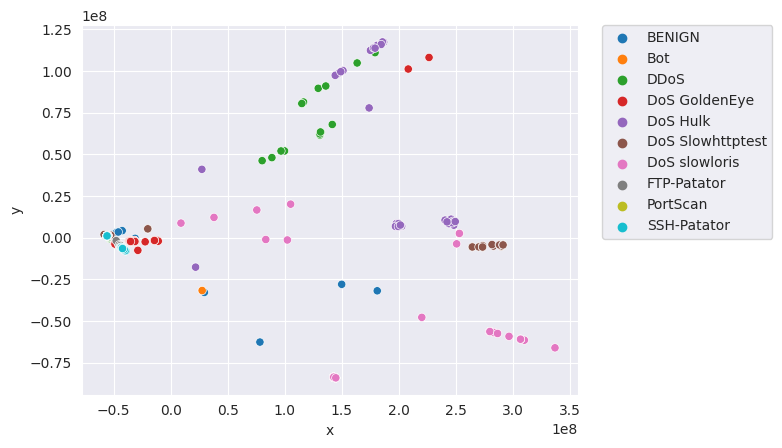

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data=df, x="x", y="y", hue="Label")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

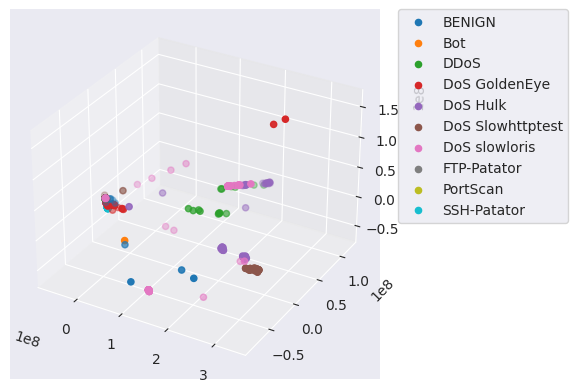

In [9]:
colors = ["red", "blue", "orange", "green", "yellow", "purple", "brown"]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for s in df.Label.unique():
    ax.scatter(df.x[df.Label==s],df.y[df.Label==s],df.z[df.Label==s],label=s)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [10]:
pd.unique(df.Label)

array(['BENIGN', 'Bot', 'DDoS', 'DoS GoldenEye', 'DoS Hulk',
       'DoS Slowhttptest', 'DoS slowloris', 'FTP-Patator', 'PortScan',
       'SSH-Patator'], dtype=object)

In [11]:
from sklearn import decomposition

d = 5
clf = decomposition.NMF(n_components=d, random_state=1, max_iter=10000, alpha_H=1)
W1 = clf.fit_transform(M_r, Labels)
H1 = clf.components_

ValueError: Negative values in data passed to NMF (input X)

In [ ]:
from sklearn import metrics

print(metrics.completeness_score(Labels, np.argmax(W1, axis=1)))
print(metrics.homogeneity_score(Labels, np.argmax(W1, axis=1)))




In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

# km = KMeans(n_clusters=8)
kmeans = KMeans(n_clusters=7, random_state=0).fit(M_r)
metrics.fowlkes_mallows_score(Labels, kmeans.labels_)

In [34]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=10, min_samples=10, leaf_size=100).fit_predict(M_r, Labels)
np.unique(clustering)
DBSCAN(eps=10, min_samples=10, leaf_size=100).fit_predict(M_r, Labels)
print(metrics.completeness_score(Labels, clustering))
print(metrics.homogeneity_score(Labels, clustering))

0.47370955480525084
0.03248163107435724


In [73]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(linkage="average",
                                n_clusters=10)
model.fit(M, Labels)

AgglomerativeClustering(linkage='average', n_clusters=10)

In [74]:
print(metrics.completeness_score(Labels, model.labels_))
print(metrics.homogeneity_score(Labels, model.labels_))

0.5934900862116526
0.24381227696717803
